In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [136]:
df=pd.read_csv('height-weight.csv')

In [137]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

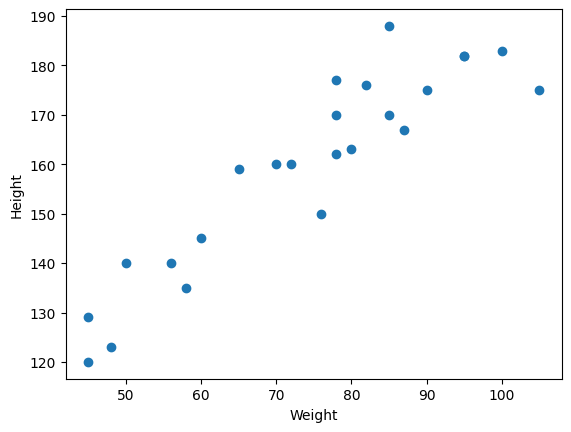

In [138]:
##scaterplot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [139]:
## Coleration
df.corr()
## highly positive correlated{0.93}

,Weight,Height
Weight,1.000000,0.919289
Height,0.919289,1.000000


In [140]:
## Dependent and Independent features
X=df[['Weight']] ## Independent feature should be in 2d array or in a dataframe
Y=df[['Height']]    ## it can be as series or 1d array

In [141]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [142]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [143]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

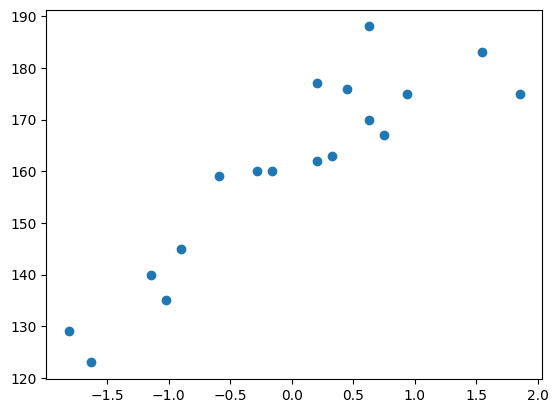

In [144]:

plt.scatter(X_train,Y_train)

In [145]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [146]:
regressor=LinearRegression(n_jobs=-1)
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
regressor.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [147]:
X_test
##print("The coefficient (Slope) =",regressor.coef_)

array([[ 1.24231357],
       [-1.50706892],
       [-1.81255587],
       [ 0.08146319],
       [ 1.24231357],
       [ 0.20365796]])

In [148]:
print("The intercept =",regressor.intercept_)

The intercept = [160.38888889]


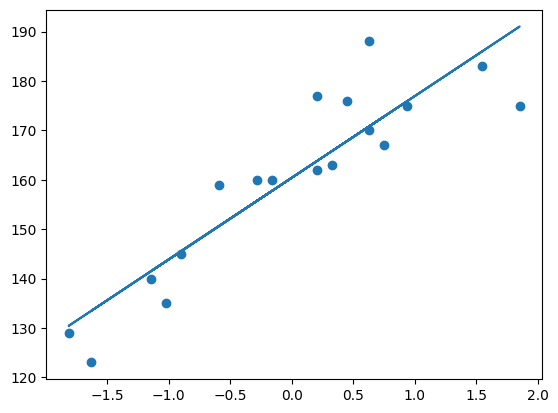

In [149]:
## Plot Training Data best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train))

In [150]:
## Pridiction on test data
y_pred_test=regressor.predict(X_test)
y_pred_test

array([[180.92181667],
       [135.48009125],
       [130.43101065],
       [161.73531038],
       [180.92181667],
       [163.75494262]])

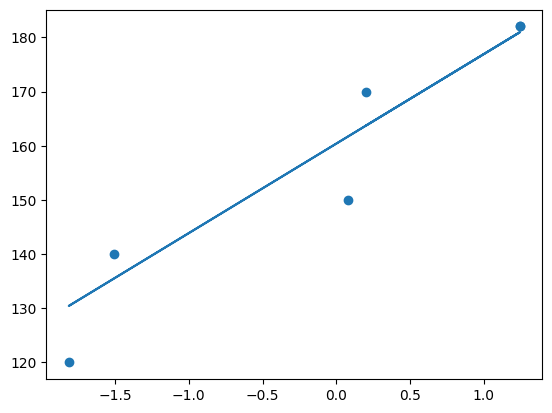

In [151]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test))

In [152]:
## Performance Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [153]:
mse=mean_squared_error(Y_test,y_pred_test)
mae=mean_absolute_error(Y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

51.37979469931446
5.847942301488554
7.16797005429811


In [154]:
from sklearn.metrics import r2_score


In [155]:
score=r2_score(Y_test,y_pred_test)
print(score)

0.9013613156369816


In [157]:
regressor.predict(scaler.transform([[88]]))

g:\code\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[173.85310383]])